# Clustering
We utilized clustering to create user and item clusters as a way to further experiment with classical recommendation systems like ALS, SVD++ and NMF. Through clustering we improved computational efficiency by minimizing our search space. Clustering was done through the use of uniform manifold approximation and projection, or UMAP, and scikit-learn. 

In [2]:
import pandas as pd
import clustering_modules as cm

## Clustering News
For news clustering, we first vectorized the titles and abstracts with scikit-learns TF-IDF and BOW vectorizers. Afterwards, we performed dimension reduction to two components with UMAP under both hellinger and euclidean distance metrics, then performed clustering of the results with HDBSCAN and Kmeans.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


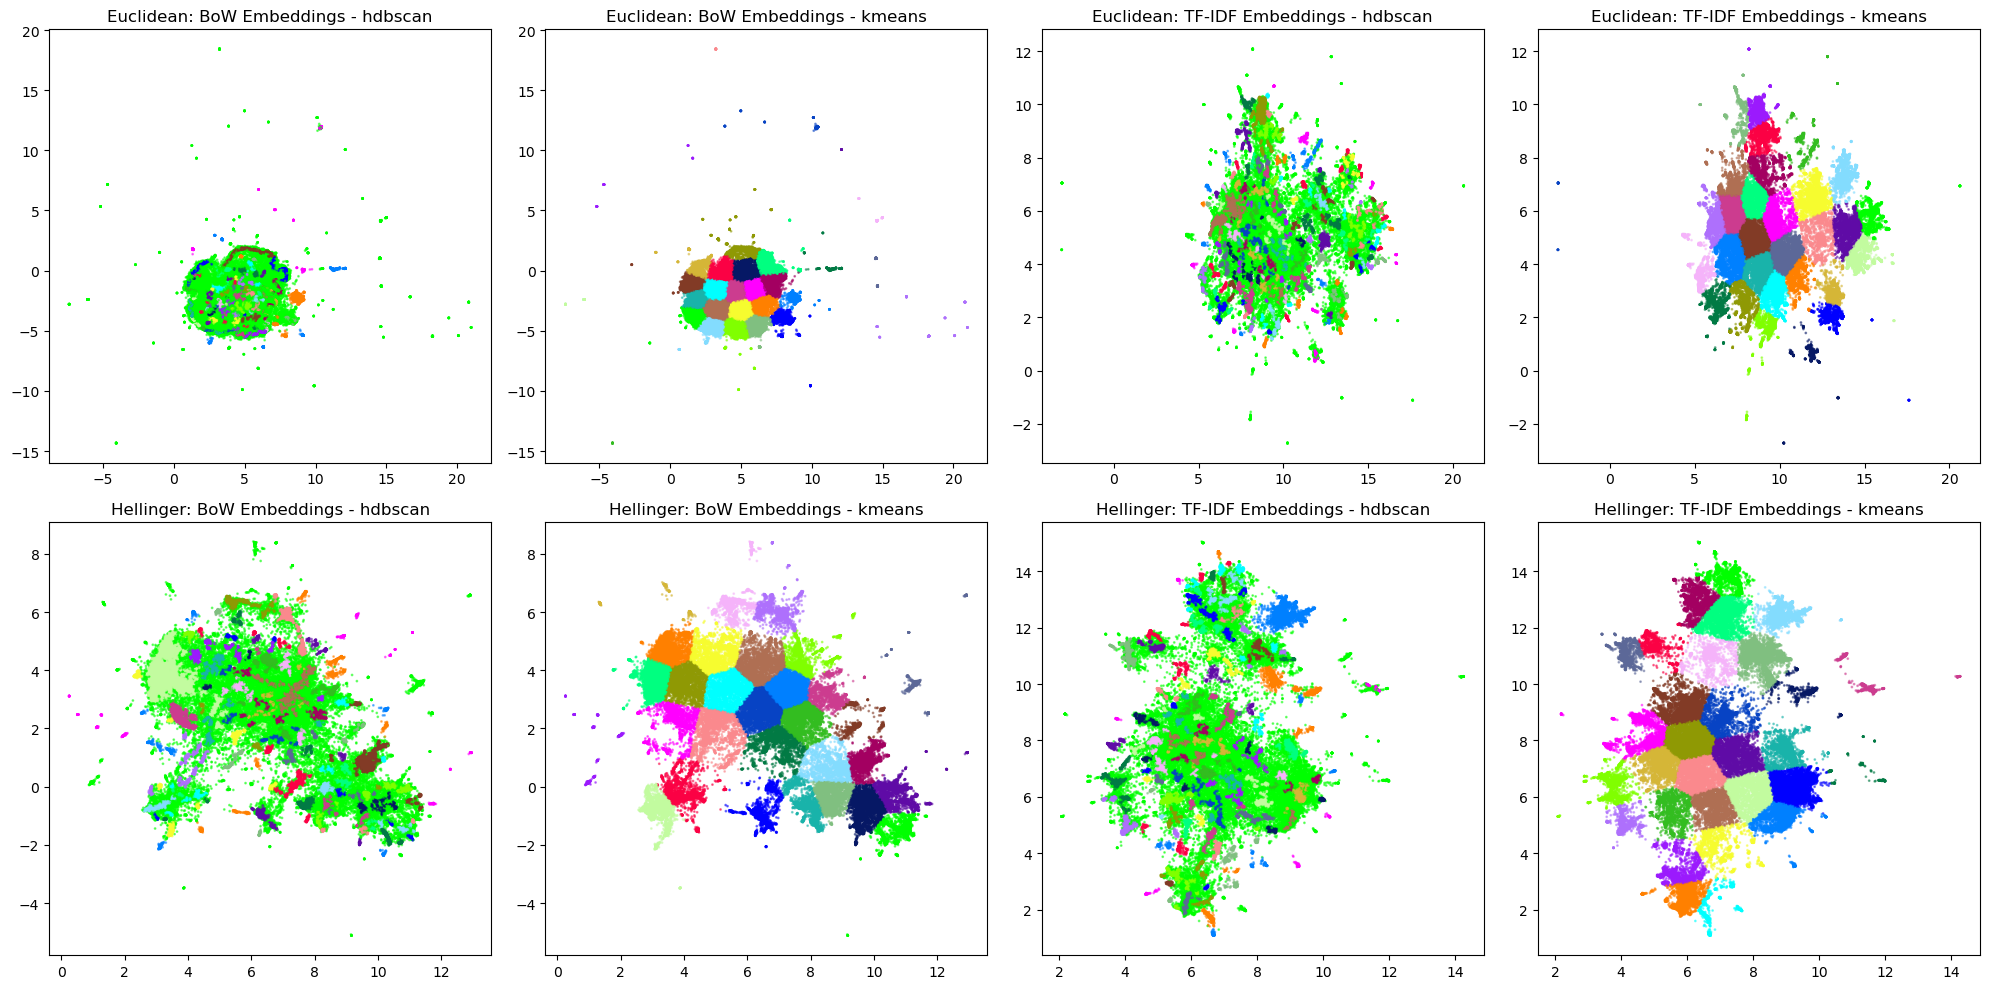

In [2]:
cm.item_cluster_exploration()

### Findings
As visible above, hdbscan classified a lot of items as noise. Since our goal was to simply minimize the search space we avoided using clusters created by hdbscan and instead focused on using clusters created via kmeans. We can see that under the hellinger distance metric embeddings had are less outliers and while clusters created for bag of words are more tightly packed together, tf-idf had larger cluster size. Ultimately we chose to apply clusters created by kmeans on tf-idf embeddings under the hellinger distance metric. Going beyond how clusters appear visually, below we examine a couple titles belonging to cluster 2. Notably, titles all relate to each other and referring to politics. Pleased with the results we moved on to clustering users.

In [4]:
news_features = pd.read_csv('../MIND_large/csv/item_features.csv')
news_features = cm.item_cluster(news_features, 30)
news_features[news_features['cluster'] == 3]['title'].head().to_list()

Item embeddings found, loading now


["The Cost of Trump's Aid Freeze in the Trenches of Ukraine's War",
 'U.S. attorney in Cleveland touts record number of drug, violent crime charges over past year',
 "With impeachment inquiry 'concerns' getting addressed, GOP have nowhere to go",
 "'This is not normal': Sen. Manchin reacts to Vindman attacks",
 'Trump cancels plans to host G7 Summit at his Florida resort']

In [5]:
# Applying our clusters to the item features data
news_features.to_csv('../MIND_large/csv/item_features.csv')

## Clustering Users
For user clustering we calculated and normalized their preferences for specific categories and found the median time of day they interact. Similarly to news, we reduced the dimension of these preferences to two components with UMAP under euclidean and cosine distance metrics, then performed clustering of the results with Kmeans.

In [ ]:
cm.user_cluster_exploration()

### Findings
From the graphs above we were able to determine that embeddings generated under a euclidean distance metric with a minimum distance of 0.1 and 50 number of neighbors performed the best. This conclusion was a result of the low number of outliers and clearly defined clusters. Under the cosine distance metric we can notice that many clusters lose their well defined boundaries in the two dimensional space. While different values of minimum distance and neighbors does also give very promising looking clusters, the resulting shapes appear less defined and uniform.

Similar to our analysis of item clusters we show a brief look at out clustering results. Below are the first 5 users belonging to cluster 7. Clustering this data is challenging as there are many features present, however most notably users in cluster 7 have very similar preferences for sports, lifestyle and median interaction time.

In [ ]:
user_features = pd.read_csv('../MIND_large/csv/user_features.csv', index_col=0)
user_features = cm.user_cluster(user_features, 50)
user_features[user_features["cluster"] == 7].head()

## Conclusions
With our users and items clustered, we moved forward onto modelling where we tested on using either user or item clusters or both.